In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from scipy.spatial.distance import squareform, pdist

col_title = "Title"
col_abstract = "Abstract"
col_abstract_clean = "Abstract Clean"
col_abstract_lemma = "Abstract Lemma"
col_publication_year= "Publication Year"
col_num_author = "Number of Authors"
col_geographic_term = "Geographic Term"
col_publisher= "Publisher"
col_published_on = "Published On"
col_conference = "Conference"
col_conference_location = "Conference Location"
col_volume = "Volume"
col_issue = "Issue"
col_type = "Type"
col_topic = "Topic"
col_topic_all = "Topic All"
col_geo_clean = col_geographic_term+"clean"
col_geo_sanitized = "Geographic term Sanitized"
col_country_sanitize = "Sanitize"
col_state_sanitize = "Sanitize State"

In [2]:
table = pd.read_pickle('files/6.4 single_state_all_topics.pkl')
sum_by_group = table.groupby([col_state_sanitize])[["Topic "+str(x) for x in range(50)]].sum()
sum_by_group.drop(["Topic 27", "Topic 34", "Topic 49"], axis=1, inplace=True)

In [3]:
sum_by_group['Sum Weight'] = sum_by_group.sum(axis=1)

In [4]:
sorted_top_states = sum_by_group.sort_values(by = ['Sum Weight'], ascending=False)[:36]
table_proportion = sorted_top_states.div(sorted_top_states["Sum Weight"], axis=0)

In [5]:
table_proportion

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Sum Weight
Sanitize State,,,,,,,,,,,,,,,,,,,,,
California,0.010533,0.010499,0.026841,0.022660,0.006240,0.018781,0.015129,0.012106,0.012706,0.006101,...,0.010690,0.015873,0.021408,0.009589,0.035742,0.022912,0.010913,0.013070,0.082634,1.0
Texas,0.009910,0.018090,0.019801,0.021956,0.004640,0.021548,0.011738,0.008306,0.012102,0.009033,...,0.013725,0.012070,0.014132,0.023853,0.036274,0.026101,0.010723,0.024215,0.071141,1.0
Florida,0.012934,0.016685,0.027297,0.021587,0.005741,0.013026,0.006583,0.012676,0.007675,0.009074,...,0.014252,0.012727,0.024580,0.024981,0.029187,0.015605,0.008413,0.018889,0.085347,1.0
New York,0.007635,0.006675,0.029644,0.029451,0.006789,0.027165,0.011017,0.012508,0.017009,0.007389,...,0.016747,0.013270,0.015744,0.008137,0.047722,0.018158,0.020184,0.004721,0.079460,1.0
Washington,0.010703,0.015829,0.031302,0.023962,0.005760,0.012349,0.009029,0.009114,0.014481,0.008992,...,0.016213,0.015857,0.016947,0.018592,0.038872,0.035777,0.008422,0.014407,0.085916,1.0
Virginia,0.016623,0.027551,0.034741,0.027048,0.008108,0.017854,0.006007,0.018817,0.007955,0.009554,...,0.012825,0.008387,0.016285,0.020313,0.020846,0.013547,0.009100,0.029396,0.083778,1.0
Minnesota,0.011723,0.012532,0.026196,0.031571,0.006582,0.011507,0.005229,0.018608,0.004734,0.008614,...,0.007074,0.020897,0.019208,0.011690,0.053095,0.011112,0.010984,0.021725,0.070498,1.0
Illinois,0.010131,0.010503,0.026711,0.022566,0.004080,0.069222,0.008143,0.011765,0.013522,0.006257,...,0.007783,0.011352,0.015593,0.016134,0.045002,0.011796,0.014917,0.033900,0.055969,1.0
Oregon,0.008479,0.004623,0.022645,0.027100,0.003106,0.007311,0.012035,0.011335,0.007604,0.006664,...,0.010615,0.044069,0.021239,0.021863,0.043341,0.012323,0.014724,0.012395,0.088090,1.0


In [6]:
dist_matrix = pd.DataFrame(squareform(pdist(table_proportion)), columns=table_proportion.index, index = table_proportion.index)

In [7]:
my_data =[(index, min([x for x in row if x > 0]), max(row)) for index, row in dist_matrix.iterrows()]

In [8]:
min_max_distance = pd.DataFrame(my_data, columns=["State", "Min", "Max"])

In [9]:
dist_matrix

Sanitize State,California,Texas,Florida,New York,Washington,Virginia,Minnesota,Illinois,Oregon,North Carolina,...,Tennessee,Missouri,South Carolina,Alaska,Mississippi,New Mexico,Alabama,Connecticut,Nevada,Oklahoma
Sanitize State,,,,,,,,,,,,,,,,,,,,,
California,0.000000,0.056324,0.090777,0.068655,0.061504,0.074886,0.063045,0.071850,0.066023,0.075297,...,0.086952,0.110275,0.096268,0.150230,0.112722,0.170955,0.121667,0.105988,0.106643,0.207874
Texas,0.056324,0.000000,0.076974,0.093696,0.062953,0.048258,0.053252,0.068984,0.081389,0.065244,...,0.064017,0.102363,0.081592,0.129055,0.101268,0.138663,0.104481,0.100152,0.072585,0.176049
Florida,0.090777,0.076974,0.000000,0.111955,0.075975,0.066571,0.076272,0.103090,0.093986,0.055832,...,0.077617,0.076457,0.096125,0.163671,0.132281,0.162222,0.079287,0.109541,0.095768,0.215044
New York,0.068655,0.093696,0.111955,0.000000,0.071666,0.109742,0.089741,0.086519,0.082689,0.096927,...,0.112332,0.130518,0.109769,0.168491,0.124380,0.200532,0.138325,0.111368,0.131297,0.237035
Washington,0.061504,0.062953,0.075975,0.071666,0.000000,0.077279,0.075713,0.089277,0.071569,0.062798,...,0.077476,0.097467,0.079692,0.143404,0.107380,0.170894,0.103179,0.091158,0.106392,0.213665
Virginia,0.074886,0.048258,0.066571,0.109742,0.077279,0.000000,0.065948,0.087331,0.091517,0.073941,...,0.069497,0.092257,0.077379,0.138009,0.103812,0.140566,0.097693,0.100103,0.078080,0.179741
Minnesota,0.063045,0.053252,0.076272,0.089741,0.075713,0.065948,0.000000,0.076378,0.071447,0.063491,...,0.082735,0.105740,0.101777,0.155245,0.125165,0.157592,0.111137,0.105245,0.086118,0.197668
Illinois,0.071850,0.068984,0.103090,0.086519,0.089277,0.087331,0.076378,0.000000,0.098676,0.092739,...,0.084724,0.124541,0.091132,0.155134,0.101676,0.161904,0.123310,0.110323,0.106981,0.197035
Oregon,0.066023,0.081389,0.093986,0.082689,0.071569,0.091517,0.071447,0.098676,0.000000,0.069909,...,0.110208,0.113918,0.106282,0.170749,0.134379,0.197423,0.123217,0.123307,0.118685,0.235910


In [10]:
table_proportion.index.rename("States of USA", inplace = True)
table_proportion.drop(["Sum Weight"], axis=1, inplace=True)
table_proportion.head(10)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48
States of USA,,,,,,,,,,,,,,,,,,,,,
California,0.010533,0.010499,0.026841,0.022660,0.006240,0.018781,0.015129,0.012106,0.012706,0.006101,...,0.017802,0.010690,0.015873,0.021408,0.009589,0.035742,0.022912,0.010913,0.013070,0.082634
Texas,0.009910,0.018090,0.019801,0.021956,0.004640,0.021548,0.011738,0.008306,0.012102,0.009033,...,0.007295,0.013725,0.012070,0.014132,0.023853,0.036274,0.026101,0.010723,0.024215,0.071141
Florida,0.012934,0.016685,0.027297,0.021587,0.005741,0.013026,0.006583,0.012676,0.007675,0.009074,...,0.005128,0.014252,0.012727,0.024580,0.024981,0.029187,0.015605,0.008413,0.018889,0.085347
New York,0.007635,0.006675,0.029644,0.029451,0.006789,0.027165,0.011017,0.012508,0.017009,0.007389,...,0.054207,0.016747,0.013270,0.015744,0.008137,0.047722,0.018158,0.020184,0.004721,0.079460
Washington,0.010703,0.015829,0.031302,0.023962,0.005760,0.012349,0.009029,0.009114,0.014481,0.008992,...,0.015678,0.016213,0.015857,0.016947,0.018592,0.038872,0.035777,0.008422,0.014407,0.085916
Virginia,0.016623,0.027551,0.034741,0.027048,0.008108,0.017854,0.006007,0.018817,0.007955,0.009554,...,0.003327,0.012825,0.008387,0.016285,0.020313,0.020846,0.013547,0.009100,0.029396,0.083778
Minnesota,0.011723,0.012532,0.026196,0.031571,0.006582,0.011507,0.005229,0.018608,0.004734,0.008614,...,0.005818,0.007074,0.020897,0.019208,0.011690,0.053095,0.011112,0.010984,0.021725,0.070498
Illinois,0.010131,0.010503,0.026711,0.022566,0.004080,0.069222,0.008143,0.011765,0.013522,0.006257,...,0.013377,0.007783,0.011352,0.015593,0.016134,0.045002,0.011796,0.014917,0.033900,0.055969
Oregon,0.008479,0.004623,0.022645,0.027100,0.003106,0.007311,0.012035,0.011335,0.007604,0.006664,...,0.011180,0.010615,0.044069,0.021239,0.021863,0.043341,0.012323,0.014724,0.012395,0.088090


In [11]:
table_proportion.to_pickle("files/6.8 table_proportion_states.pkl")

In [12]:
df_distribution = table_proportion.unstack().reset_index(name='value')
df_distribution.rename(columns={'level_0': 'Topic'}, inplace=True)


df_distribution

,Topic,States of USA,value
0,Topic 0,California,0.010533
1,Topic 0,Texas,0.009910
2,Topic 0,Florida,0.012934
3,Topic 0,New York,0.007635
4,Topic 0,Washington,0.010703
...,...,...,...
1687,Topic 48,New Mexico,0.035481
1688,Topic 48,Alabama,0.046871
1689,Topic 48,Connecticut,0.057381
1690,Topic 48,Nevada,0.063821


In [13]:
topic_names = pd.read_csv("data/topic_names.csv")

In [14]:
topic_names

,topic,name,name2
0,0,Driving simulation,Driving simulation
1,1,Reinforced concrete,Reinforced concrete
2,2,Bridge,Bridge
3,3,Travel time,Travel time
4,4,Noise,Noise
5,5,Optimization model,Optimization model
6,6,Power and energy,Power and energy
7,7,Sensor for detection,Sensor for detection
8,8,Freight port,Freight port
9,9,Fluid mechanics,Fluid mechanics


In [15]:
topic_name_mapping = { "Topic "+str(i):topic_names.iloc[i]["name2"] +": T"+str(i)  for i in range(50)}

In [16]:
topic_name_mapping

{'Topic 0': 'Driving simulation: T0',
 'Topic 1': 'Reinforced concrete: T1',
 'Topic 2': 'Bridge: T2',
 'Topic 3': 'Travel time: T3',
 'Topic 4': 'Noise: T4',
 'Topic 5': 'Optimization model: T5',
 'Topic 6': 'Power and energy: T6',
 'Topic 7': 'Sensor for detection: T7',
 'Topic 8': 'Freight port: T8',
 'Topic 9': 'Fluid mechanics: T9',
 'Topic 10': 'Construction project and design: T10',
 'Topic 11': 'Vehicle: T11',
 'Topic 12': 'Road safety: T12',
 'Topic 13': 'Concrete materials: T13',
 'Topic 14': 'Pedestrian: T14',
 'Topic 15': 'Vehicle dynamics: T15',
 'Topic 16': 'Fatigue testing: T16',
 'Topic 17': 'Community and neighborhood: T17',
 'Topic 18': 'Route choice & traffic congestion: T18',
 'Topic 19': 'Signal control: T19',
 'Topic 20': 'Simulation model: T20',
 'Topic 21': 'Transportation planning & mgmt.: T21',
 'Topic 22': 'Model estimation and prediction: T22',
 'Topic 23': 'Traffic accident and injury: T23',
 'Topic 24': 'Crash and collision: T24',
 'Topic 25': 'Pavement: T

In [17]:
df_distribution["full_name"] = df_distribution["Topic"].map(topic_name_mapping)

In [18]:
df_distribution.head()

,Topic,States of USA,value,full_name
0,Topic 0,California,0.010533,Driving simulation: T0
1,Topic 0,Texas,0.009910,Driving simulation: T0
2,Topic 0,Florida,0.012934,Driving simulation: T0
3,Topic 0,New York,0.007635,Driving simulation: T0
4,Topic 0,Washington,0.010703,Driving simulation: T0


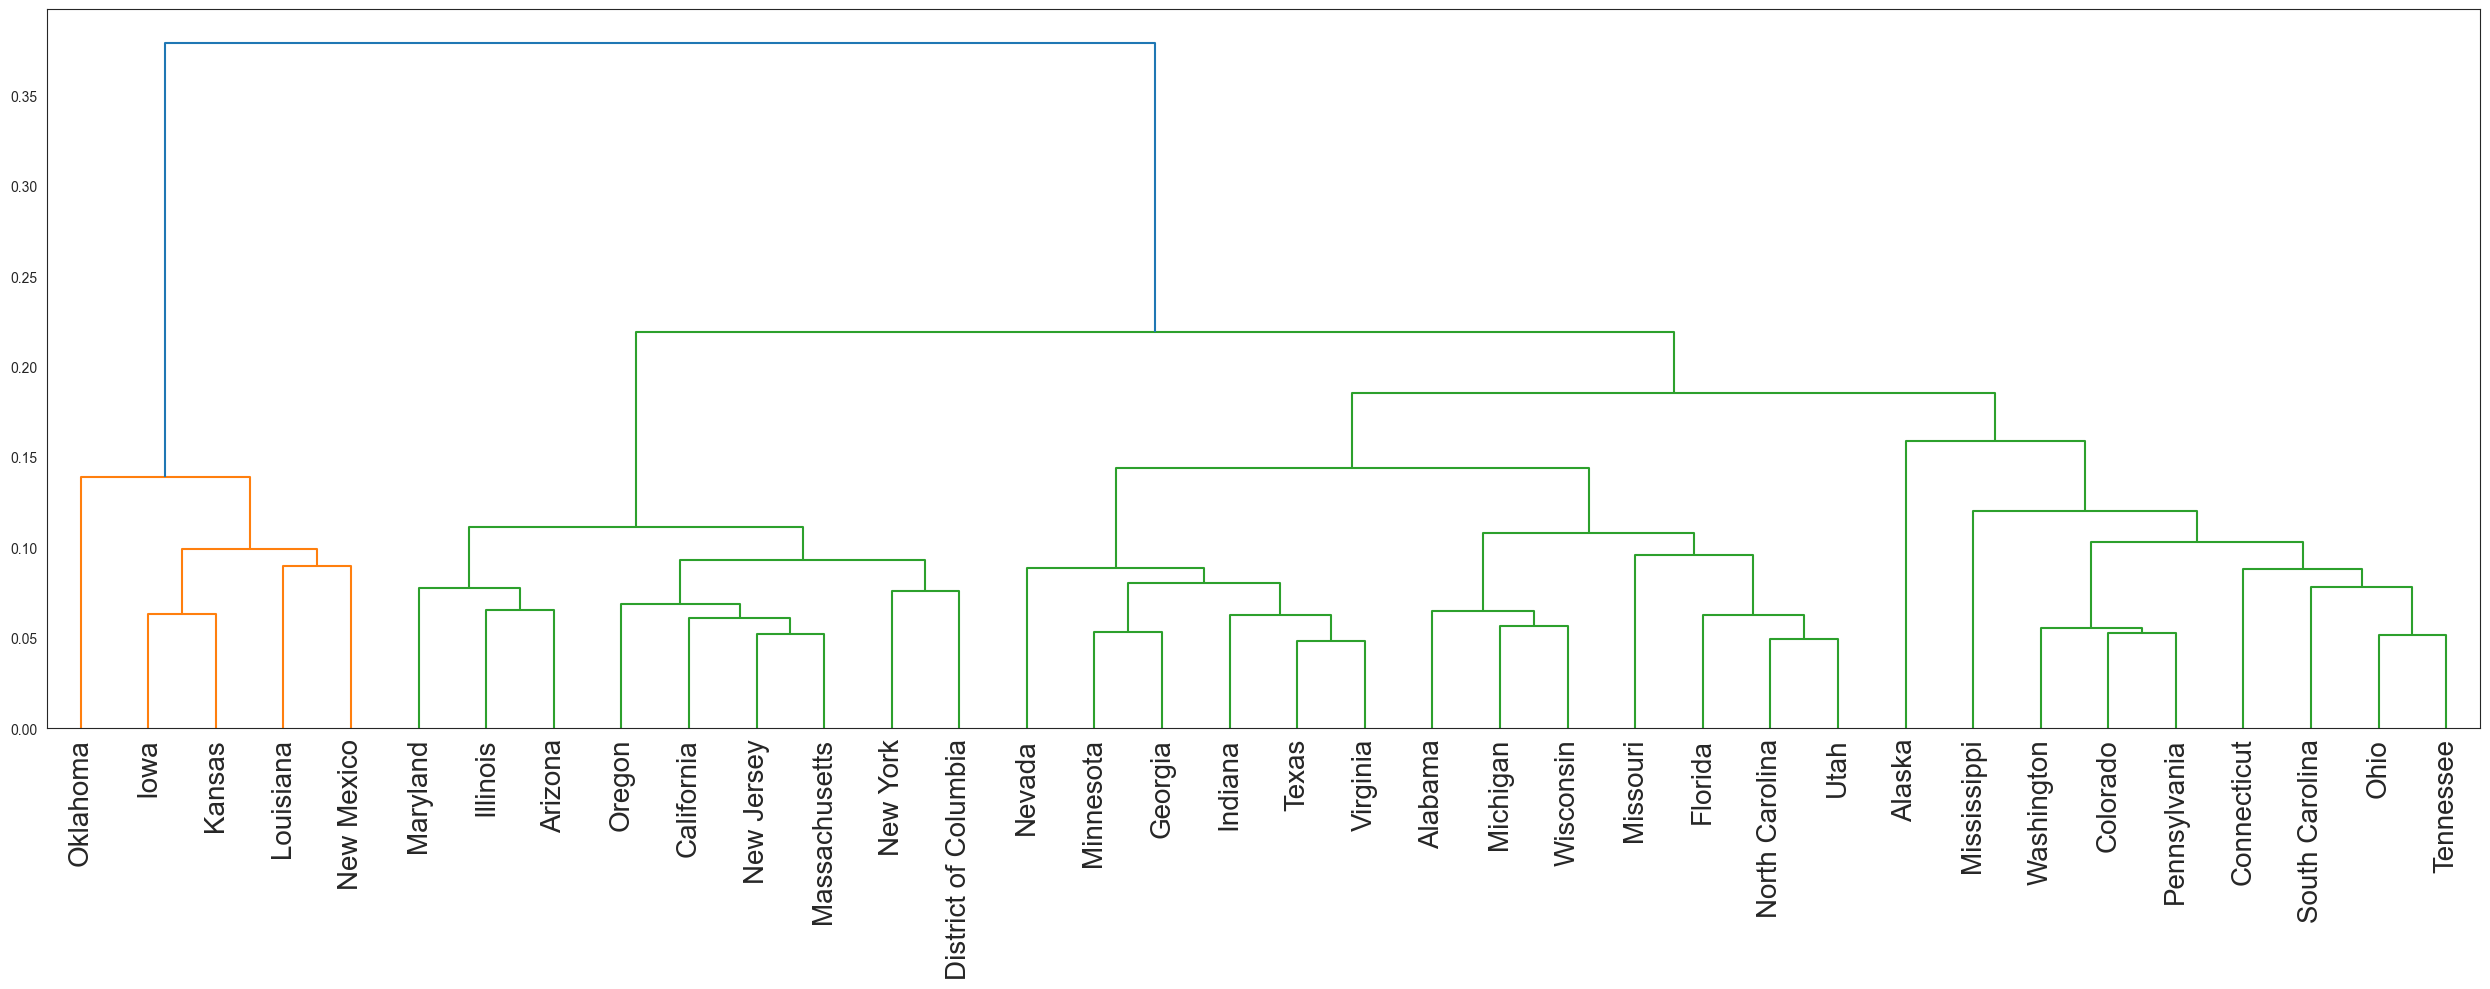

In [19]:
# Calculate the distance between each sample
sns.set_style("white")
A = hierarchy.linkage(table_proportion, 'ward')
fig = plt.figure(figsize=(25, 10))
 
# Plot with Custom leaves
dn = hierarchy.dendrogram(A, leaf_rotation=90, leaf_font_size=20,labels=table_proportion.index)
plt.tight_layout()
plt.savefig('fig/6.8 State dendrogram normal.pdf', format='pdf', dpi=500)
plt.show()

# Similar State

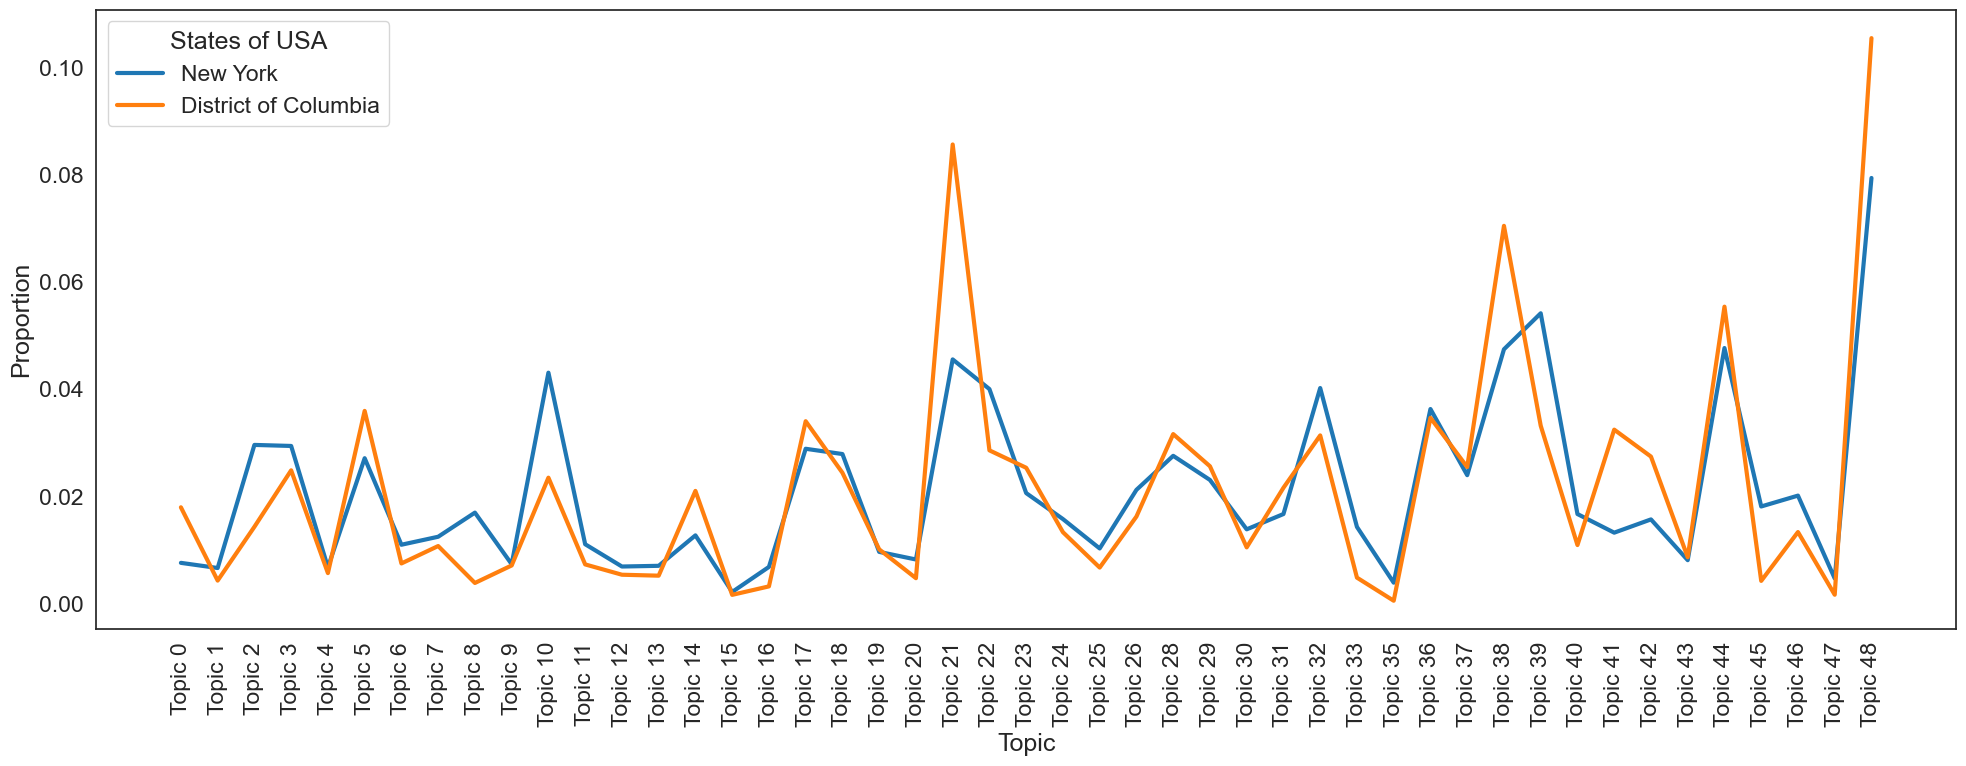

In [20]:
similar_state_1 = df_distribution[df_distribution["States of USA"].isin(["District of Columbia", "New York"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=similar_state_1)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.8 similar_state_1.pdf', format='pdf', dpi=500)
plt.show()

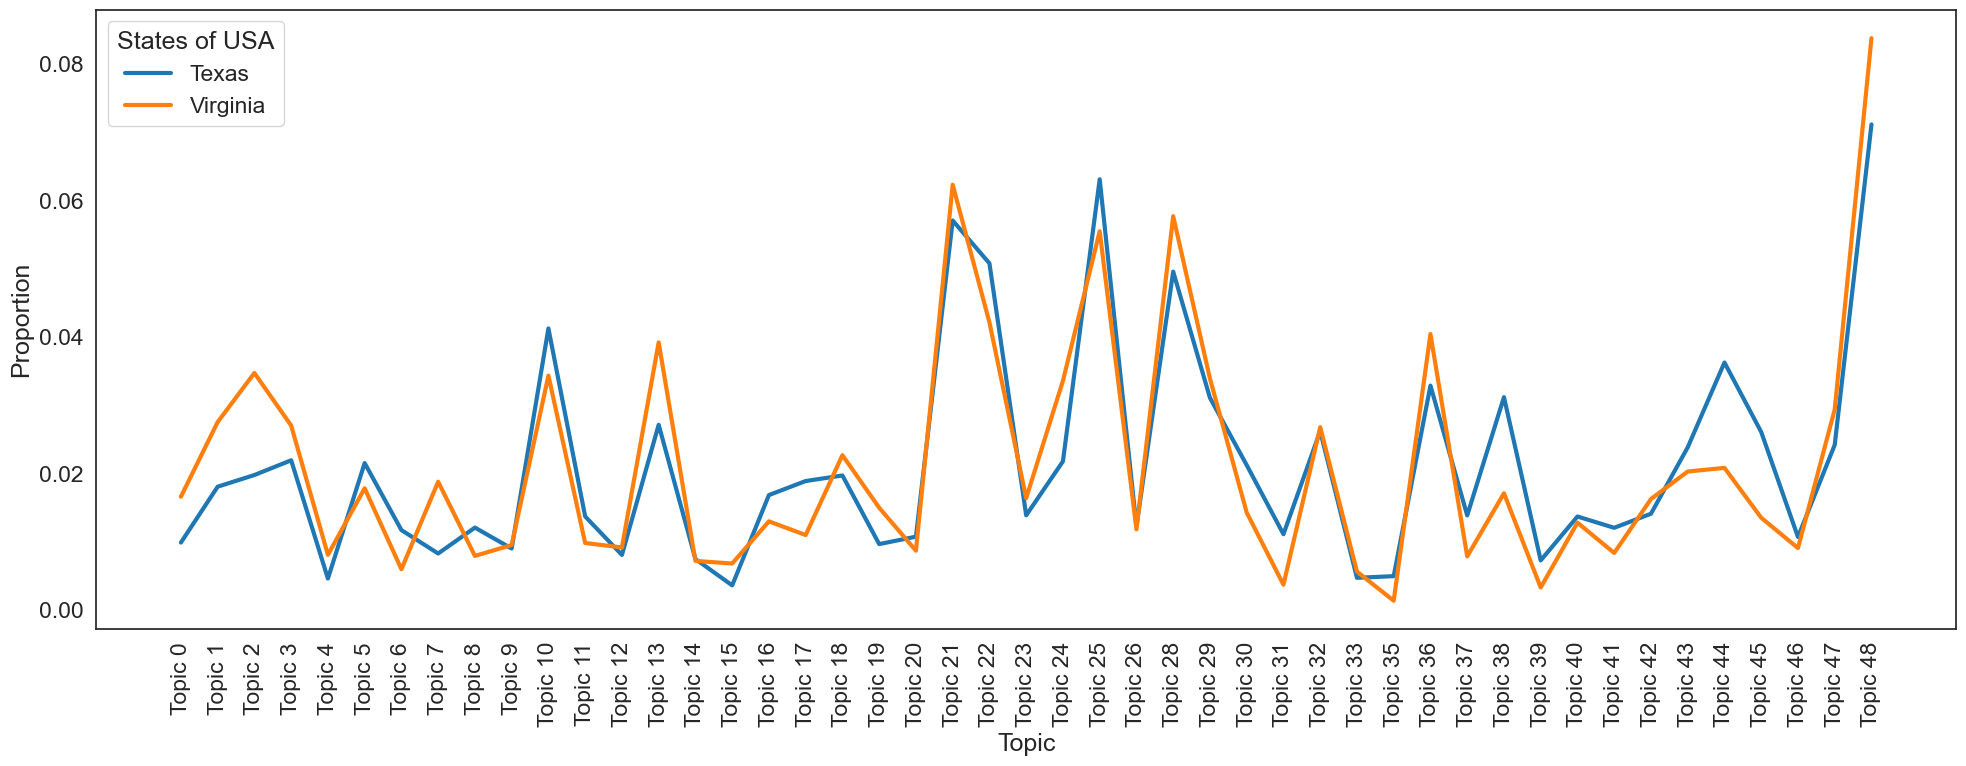

In [21]:
similar_state_2 = df_distribution[df_distribution["States of USA"].isin(["Texas", "Virginia"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=similar_state_2)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.8 similar_state_2.pdf', format='pdf', dpi=500)
plt.show()

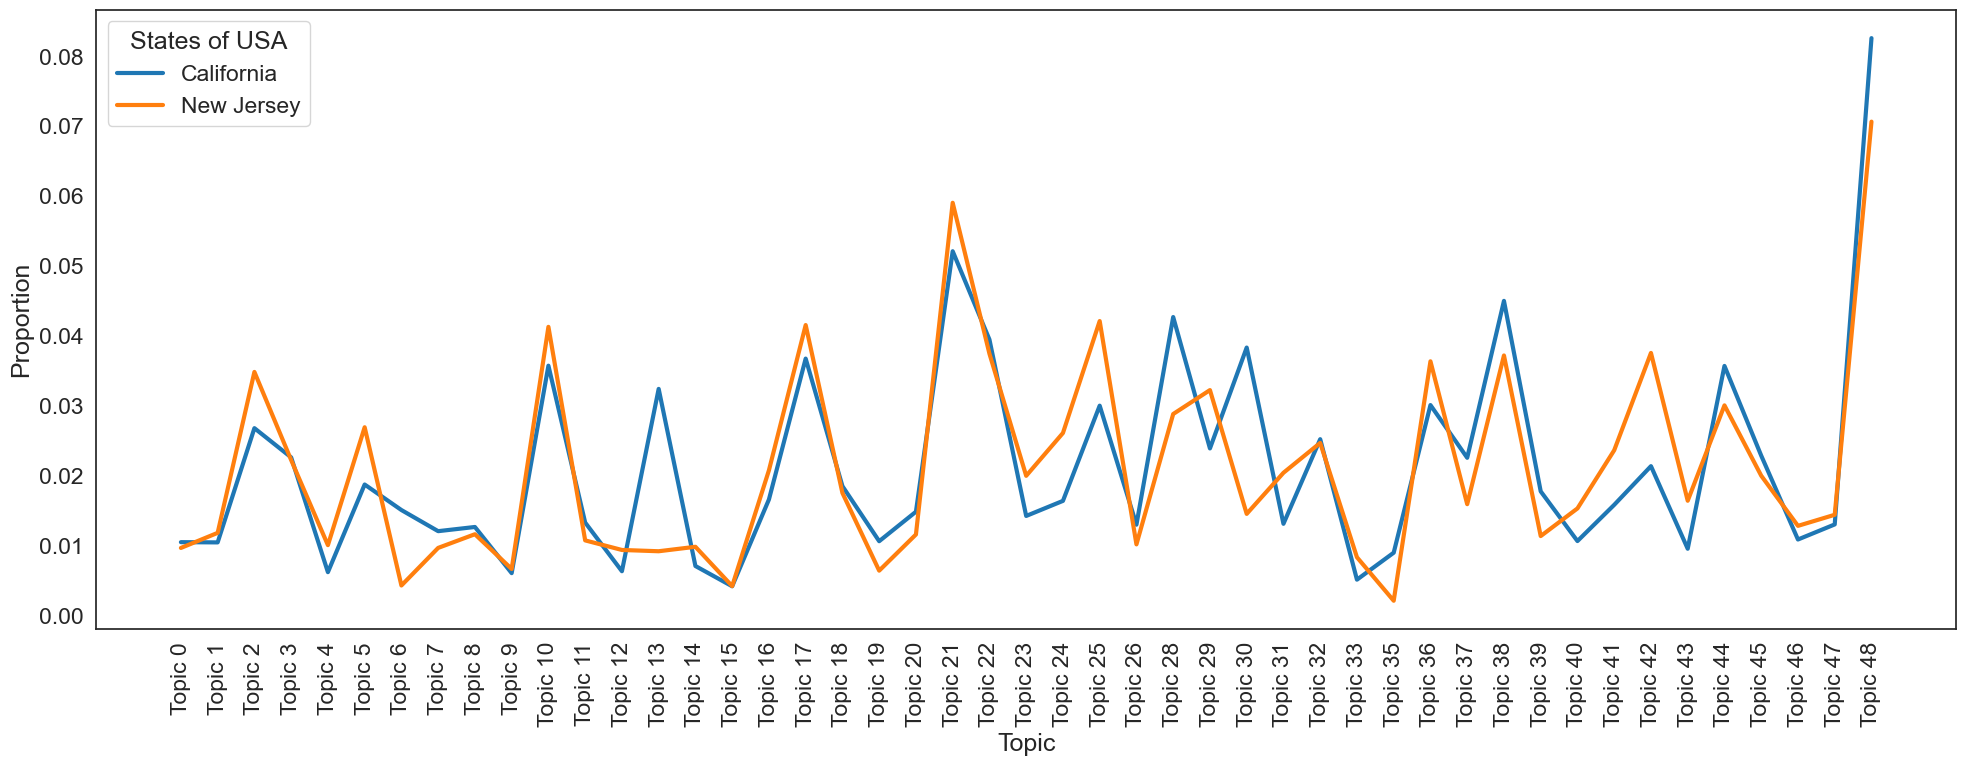

In [22]:
similar_state_2 = df_distribution[df_distribution["States of USA"].isin(["California", "New Jersey"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=similar_state_2)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.8 similar_state_5.pdf', format='pdf', dpi=500)
plt.show()

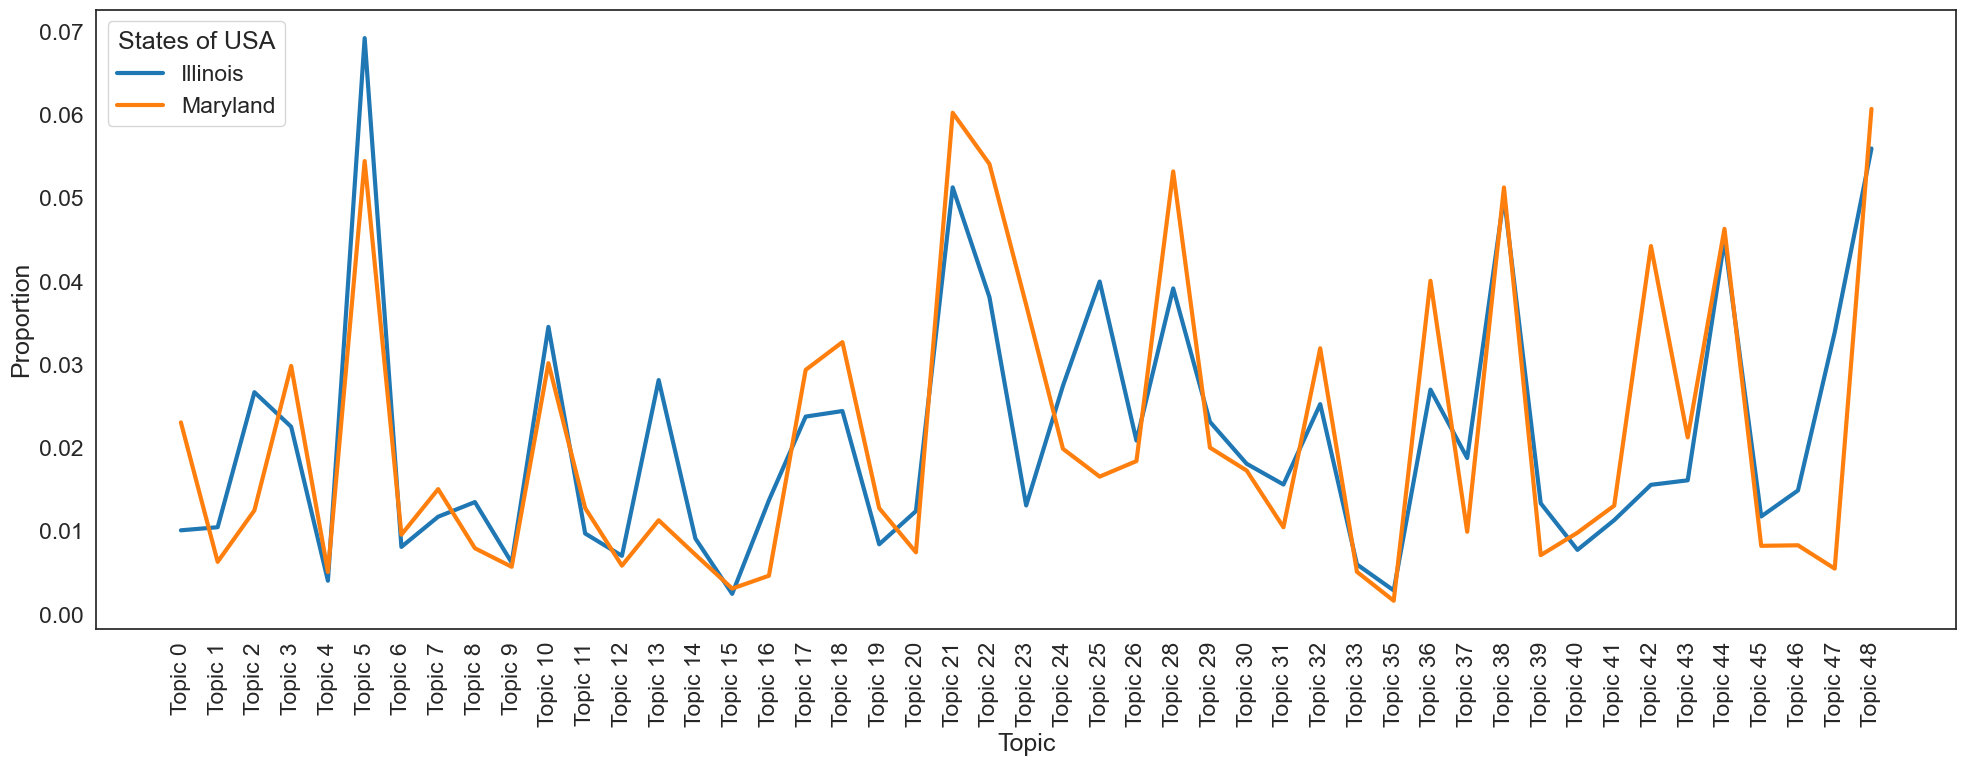

In [23]:
similar_state_3 = df_distribution[df_distribution["States of USA"].isin(["Illinois", "Maryland"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=similar_state_3)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.8 similar_state_3.pdf', format='pdf', dpi=500)
plt.show()

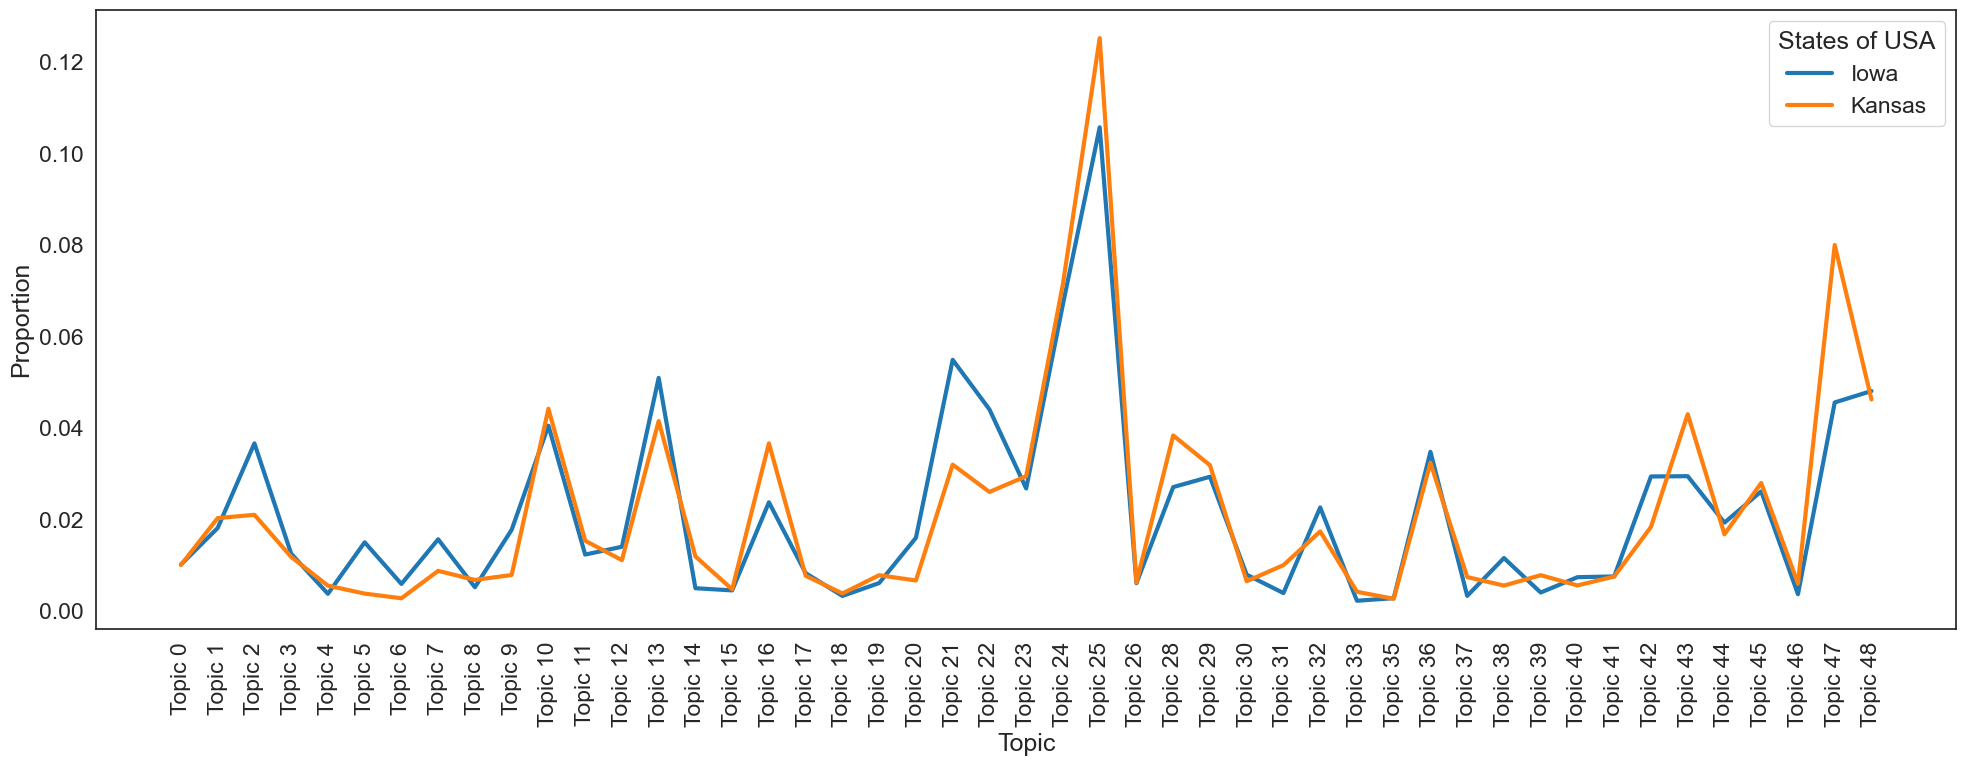

In [24]:
similar_state_4 = df_distribution[df_distribution["States of USA"].isin(["Iowa", "Kansas"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=similar_state_4)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.8 similar_state_4.pdf', format='pdf', dpi=500)
plt.show()

# Dissimilar


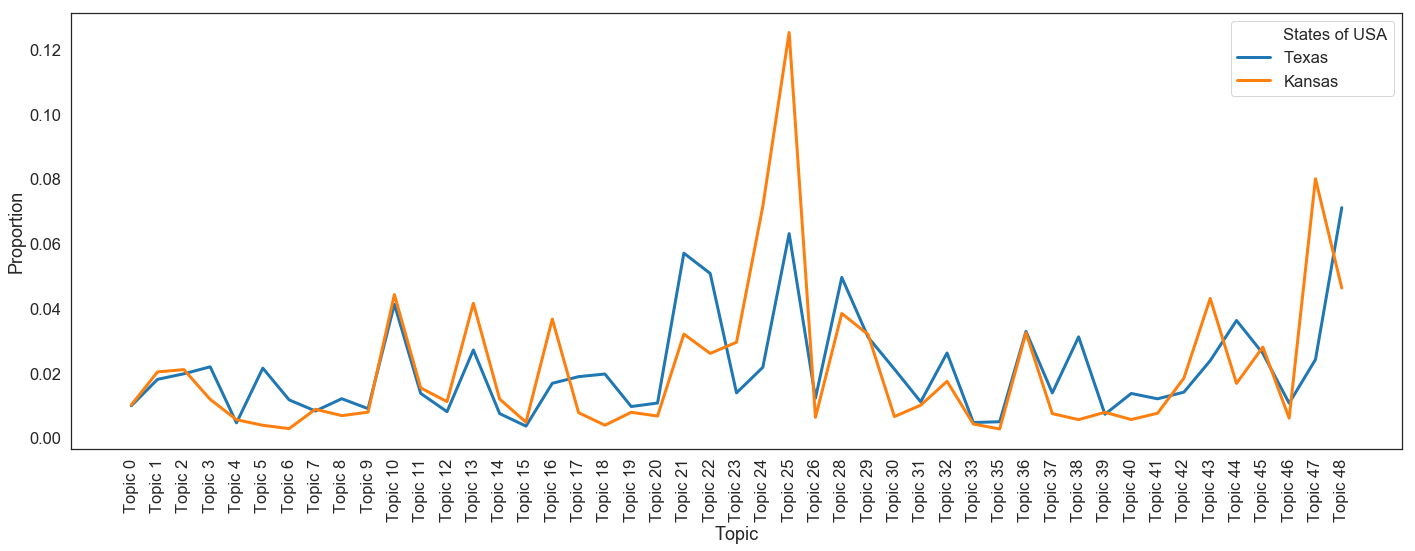

In [23]:
dissimilar_state_1 = df_distribution[df_distribution["States of USA"].isin(["Kansas", "Texas"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=dissimilar_state_1)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/dissimilar_state_1.pdf', format='pdf', dpi=500)
plt.show()

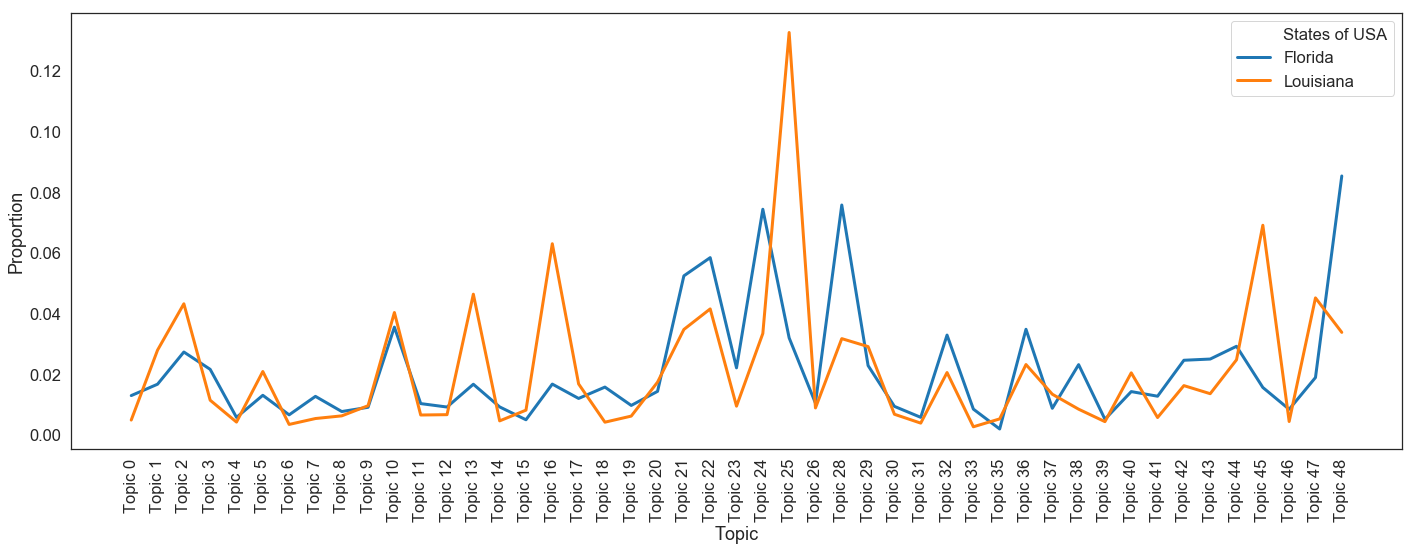

In [24]:
dissimilar_state_2 = df_distribution[df_distribution["States of USA"].isin(["Louisiana", "Florida"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=dissimilar_state_2)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/dissimilar_state_2.pdf', format='pdf', dpi=500)
plt.show()

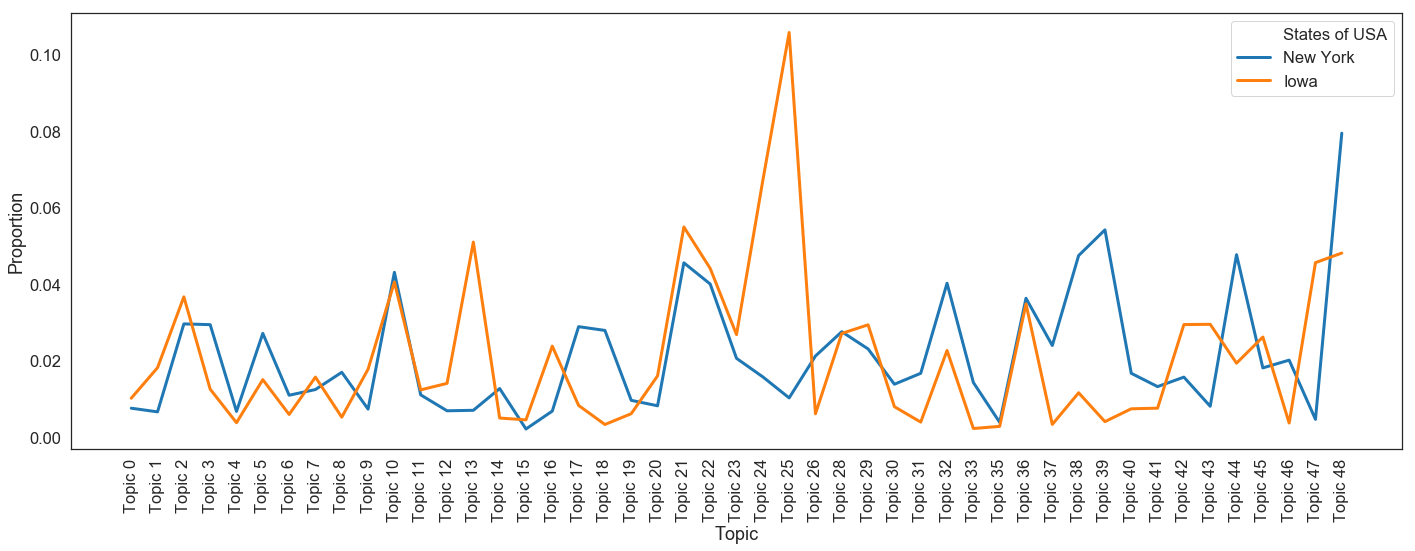

In [25]:
dissimilar_state_3 = df_distribution[df_distribution["States of USA"].isin(["Iowa", "New York"])]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("white")
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="States of USA", sort=False,  data=dissimilar_state_3)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/dissimilar_state_3.pdf', format='pdf', dpi=500)
plt.show()

In [33]:
df_distribution.head()

,Topic,States of USA,value,full_name
0,Topic 0,California,0.010533,Driving simulation: T0
1,Topic 0,Texas,0.009910,Driving simulation: T0
2,Topic 0,Florida,0.012934,Driving simulation: T0
3,Topic 0,New York,0.007635,Driving simulation: T0
4,Topic 0,Washington,0.010703,Driving simulation: T0


C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_28392\3575219281.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


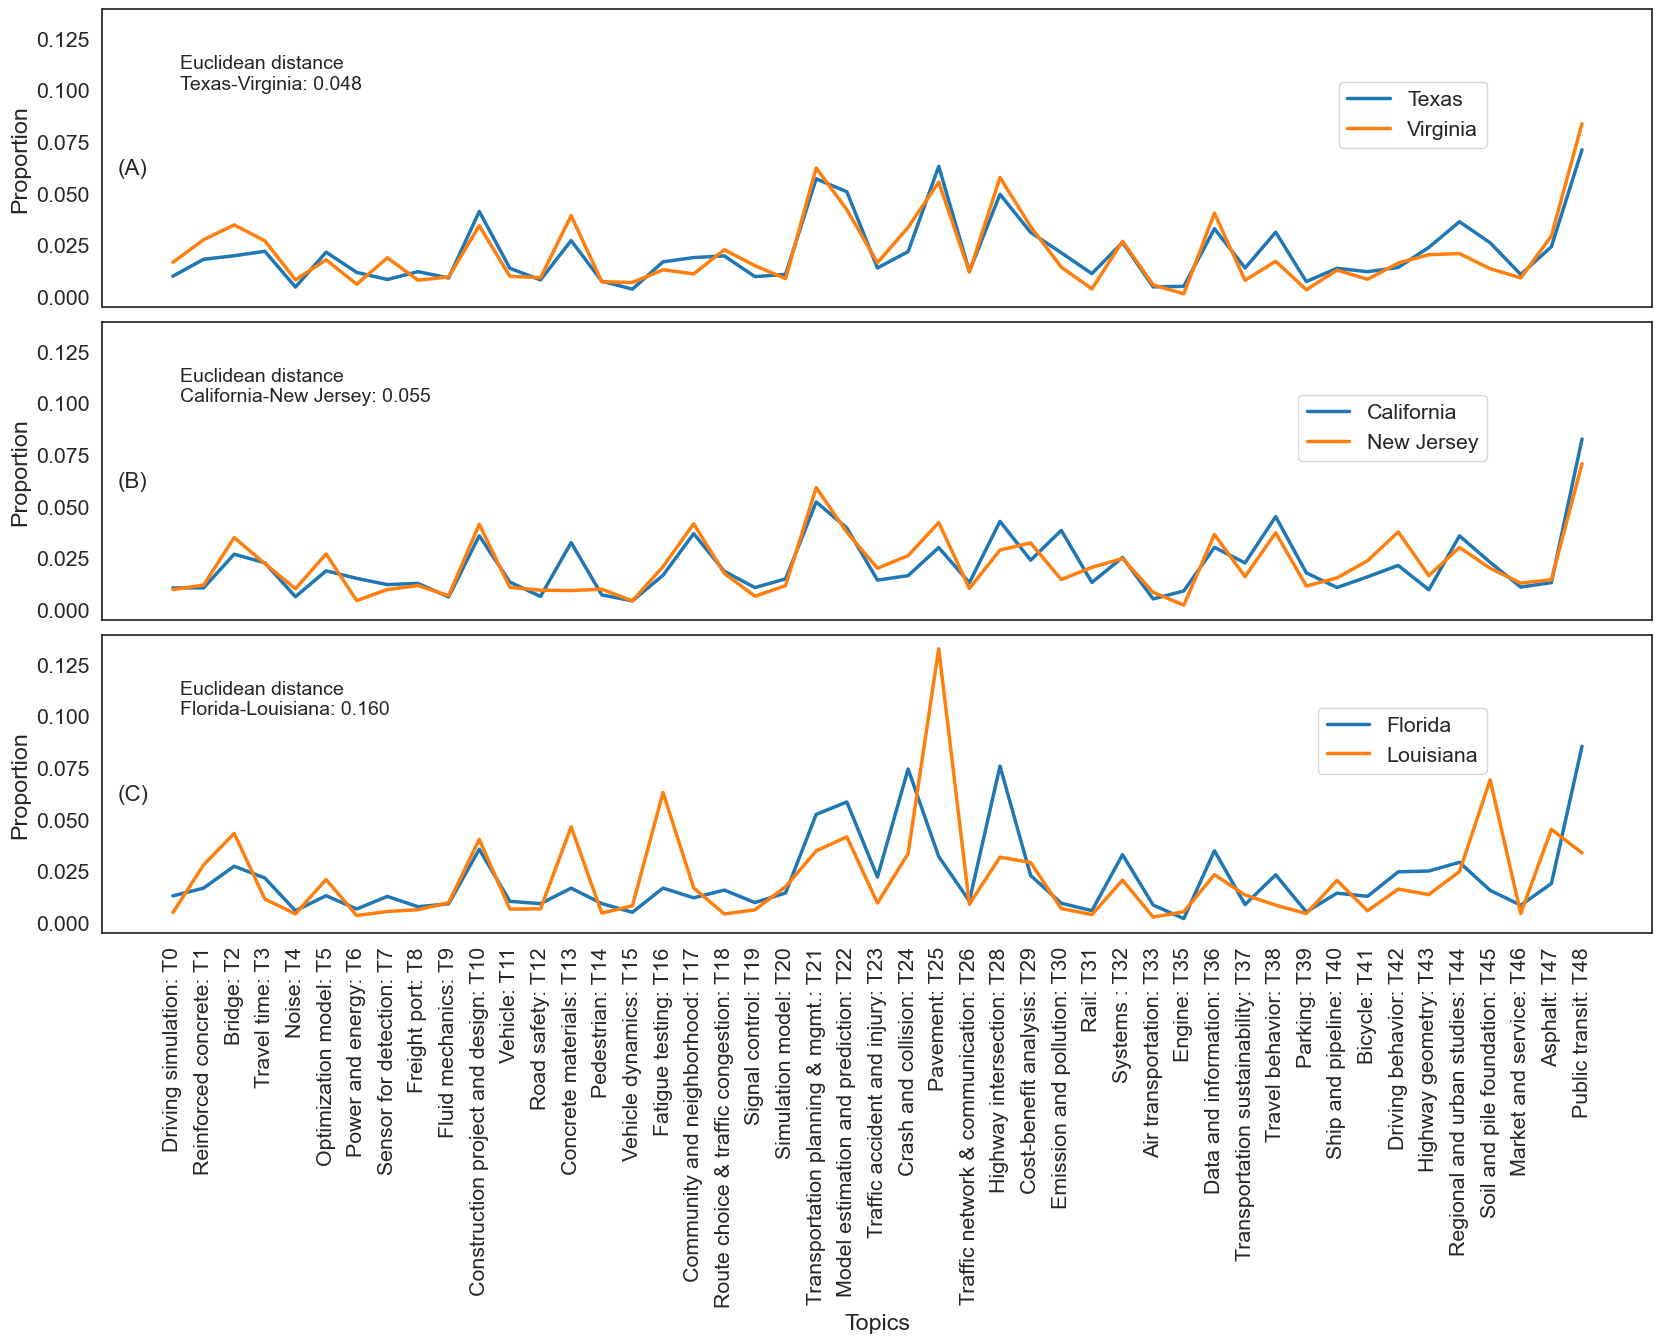

In [25]:
#similar States combined plot

sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(20,12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.9})
props = dict(boxstyle='round', facecolor='White', alpha=0.5)
states = [["Texas", "Virginia"], ["California", "New Jersey"], ["Florida", "Louisiana"]]
subplot = ["(A)", "(B)", "(C)"]
texts = ["Euclidean distance \nTexas-Virginia: 0.048", "Euclidean distance \nCalifornia-New Jersey: 0.055", "Euclidean distance \nFlorida-Louisiana: 0.160"]
for i, ax in enumerate(axes.flat):
    
    similar1 = df_distribution[df_distribution["States of USA"].isin(states[i])]
    sns.lineplot(x="full_name", y="value", hue="States of USA", sort=False,  data=similar1, ax=ax)
    ax.text(0.05, 0.85, texts[i], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.text(0.01, 0.5, subplot[i], transform=ax.transAxes, fontsize=16,
        verticalalignment='top')
    ax.xaxis.grid(False)
    ax.set_ylabel("Proportion")
    ax.legend(loc="best", bbox_to_anchor=(0.9,0.5))
plt.xticks(rotation='vertical')
plt.xlabel("Topics")
fig.tight_layout()
plt.savefig("fig/6.8 combined_similar_dissimilar_states.svg", format="svg", bbox_inches = "tight")

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_28392\461663564.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


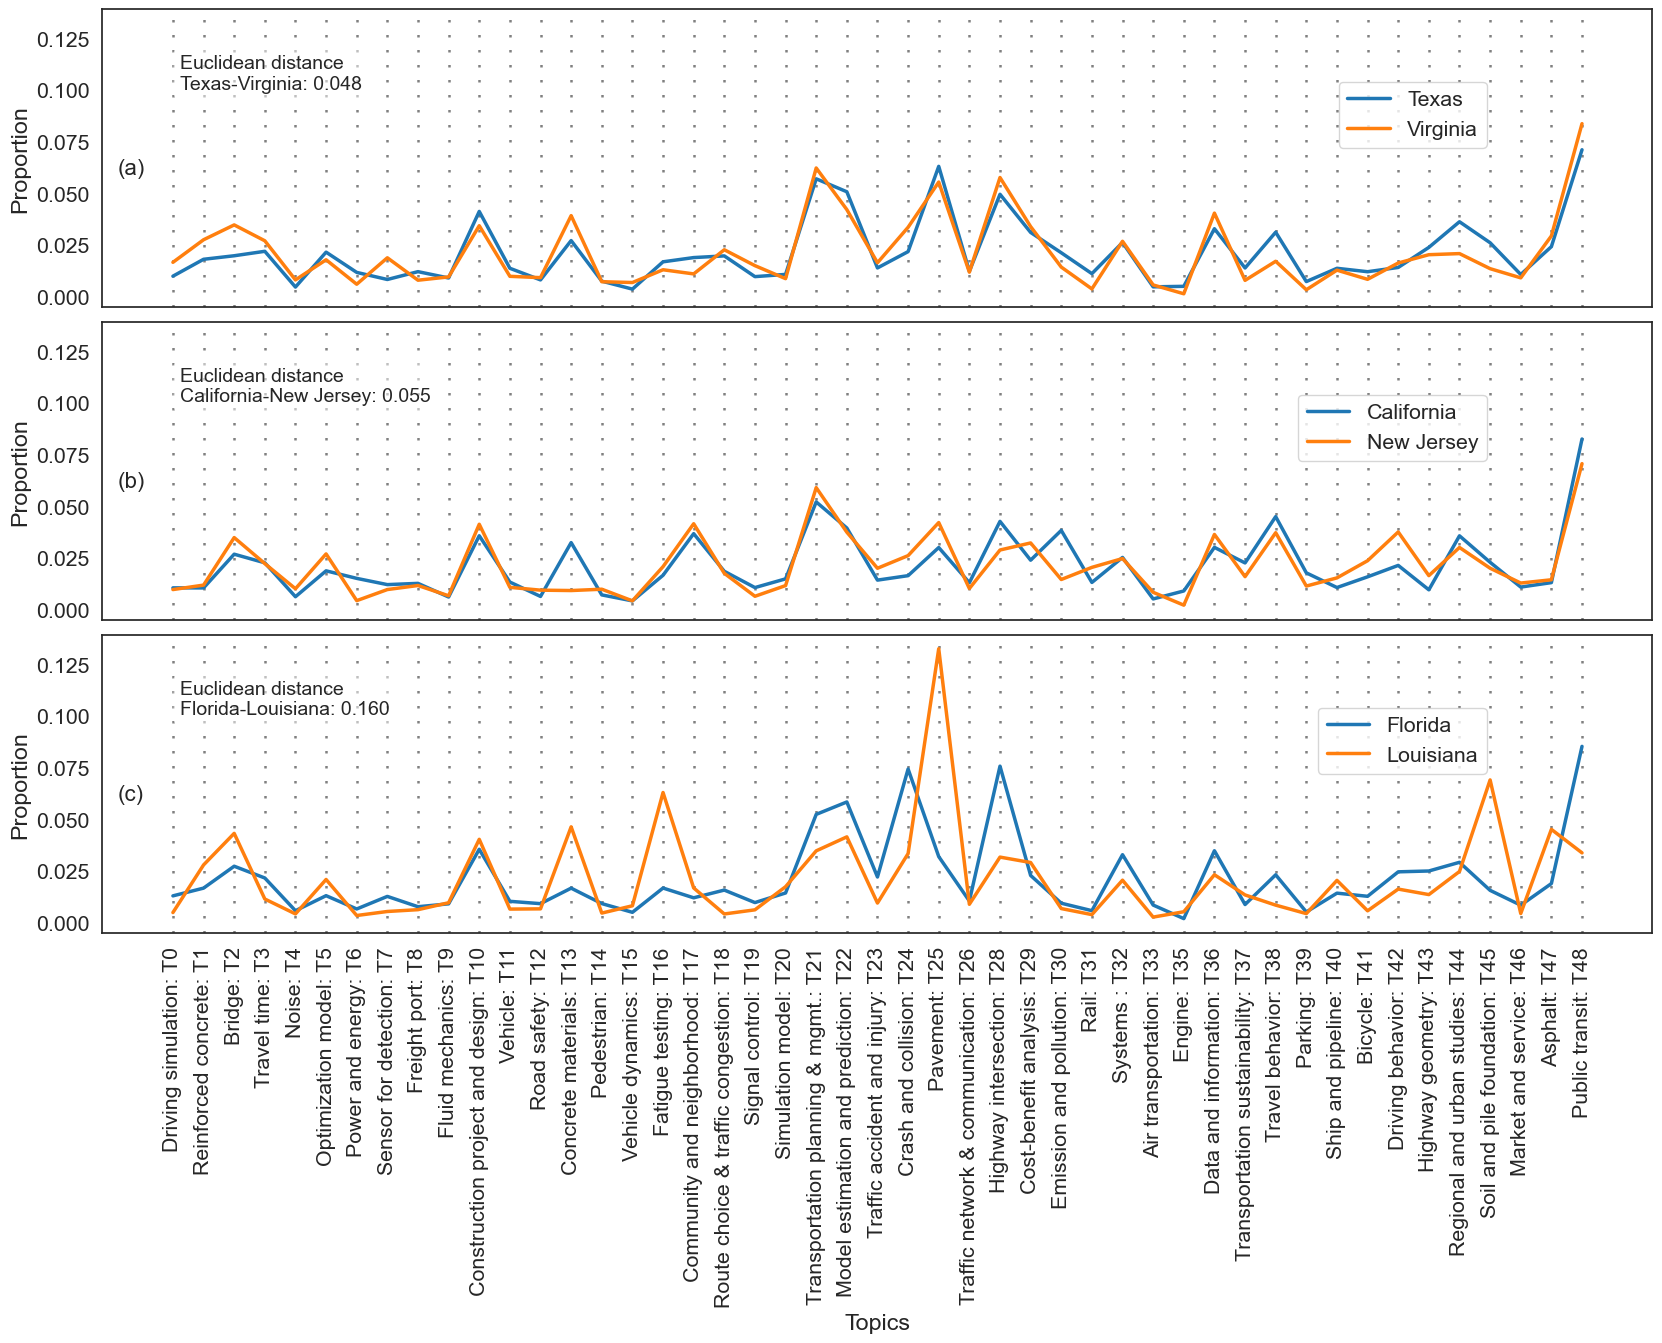

In [26]:
#similar States combined plot

sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(20,12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.9})
props = dict(boxstyle='round', facecolor='White', alpha=0.5)
states = [["Texas", "Virginia"], ["California", "New Jersey"], ["Florida", "Louisiana"]]
subplot = ["(a)", "(b)", "(c)"]
texts = ["Euclidean distance \nTexas-Virginia: 0.048", "Euclidean distance \nCalifornia-New Jersey: 0.055", "Euclidean distance \nFlorida-Louisiana: 0.160"]
for i, ax in enumerate(axes.flat):
    
    similar1 = df_distribution[df_distribution["States of USA"].isin(states[i])]
    sns.lineplot(x="full_name", y="value", hue="States of USA", sort=False,  data=similar1, ax=ax)
    ax.text(0.05, 0.85, texts[i], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.text(0.01, 0.5, subplot[i], transform=ax.transAxes, fontsize=16,
        verticalalignment='top')
    ax.xaxis.grid(color='grey', linestyle=(0, (1, 5)), linewidth=1.8)
    ax.set_ylabel("Proportion")
    ax.legend(loc="best", bbox_to_anchor=(0.9,0.5))
plt.xticks(rotation='vertical')
plt.xlabel("Topics")
fig.tight_layout()
plt.savefig("fig/6.8 combined_similar_dissimilar_states_grid.svg", format="svg", bbox_inches = "tight")